# 6 Evaluations of uncertainty: a practical example

In this chapter you will do an experiment to measure the speed of sound in air and use the opportunity to further develop your understanding about measurement and uncertainty.


## 6.1 The speed of sound experiment

Say that you have just returned from doing an experiment on a sports field. A starter’s pistol (used to start races at athletic meetings) was fired several times, and each time a large group of students used stopwatches to record the time between hearing the original bang and the echo after the sound reflected back from a wall which was about 80 metres away. In this way a large number of readings for the time $t$ were collected. The distance $d$ was measured once by a smaller group of students using a measuring tape.


<img src="C6-Fig1.png" style="width: 600px;"/>

The aim of the experiment is to measure the speed of the sound in air vs which may be calculated by $v_s = 2d t$ . In order to know something about $v_s$ , we first need to analyse our data for $t$ and $d$ separately.

## 6.1 Analyzing the time data

A set of data for $t$ which were taken by a previous class is given below so that we can all work with the same values. This data can be loaded from the file ```speed_of_sound_time_data.csv``` (The .csv extension means the file contains comma separated values, a file format that is easy for Python to read)

<img src="C6-Fig2.png" style="width: 600px;"/>

It is clear just by looking at Table 6.1 that the time readings are dispersed. Why do you think this is so? What are the possible causes of the scatter?  Enter your answer in the cell below by replacing the text between the quote symbols with your answer.

In [ ]:
print("Insert your answer between the quote symbols here")

We need to import the data file to analyze the data.  Make sure that the file ```speed_of_sound_time_data.csv``` is in the same directory as this Jupyter notebook.  We will create a variable named ```time_data``` to store the data read from the file.

We need to import a set of commands called ```pandas``` (which stands for **pa**nel **da**ta **s**ets) to help us manipulate and plot the data.

Hit <kbd>Shift</kbd>+<kbd>Enter</kbd> to import the data.


In [3]:
%matplotlib inline  
#Used to show plots and graphs in the notebook

import pandas as pd  #Import all of the function in pandas

time_data=pd.read_csv('speed_of_sound_time_data.csv')   #Read in the data file

print(time_data)  #Print out the data to make sure everything imported ok

    Times
0   0.671
1   0.442
2   0.554
3   0.216
4   0.701
5   0.440
6   0.665
7   0.501
8   0.346
9   0.535
10  0.525
11  0.421
12  0.541
13  0.453
14  0.460
15  0.391
16  0.484
17  0.377
18  0.549
19  0.816
20  0.561
21  0.464
22  0.634
23  0.637
24  0.477
25  0.269
26  0.504
27  0.425
28  0.289
29  0.563
30  0.592
31  0.484
32  0.343
33  0.605
34  0.351
35  0.337
36  0.636
37  0.578
38  0.476
39  0.513
40  0.687
41  0.378
42  0.426
43  0.482
44  0.632
45  0.596
46  0.575
47  0.533
48  0.405


In [7]:
###
# Consider deleting this cell - maybe too confusing
# or maybe only include for PHYS-439 students
###

op=time_data.Times.value_counts(bins=10)

op.sort_index()
#This returns a series, not a dataframe

print(list(op))

freq_table=pd.DataFrame({'frequency':op.values, 'range':op.index})

#convert Series into a dataframe and set old index to one of the columns

print(freq_table)

freq_table['relative_freq']=freq_table.frequency/freq_table.frequency.sum()
print(freq_table)

[10, 9, 7, 7, 6, 5, 2, 1, 1, 1]
   frequency           range
0         10  (0.456, 0.516]
1          9  (0.516, 0.576]
2          7  (0.396, 0.456]
3          7  (0.336, 0.396]
4          6  (0.576, 0.636]
5          5  (0.636, 0.696]
6          2  (0.214, 0.276]
7          1  (0.756, 0.816]
8          1  (0.696, 0.756]
9          1  (0.276, 0.336]
   frequency           range  relative_freq
0         10  (0.456, 0.516]       0.204082
1          9  (0.516, 0.576]       0.183673
2          7  (0.396, 0.456]       0.142857
3          7  (0.336, 0.396]       0.142857
4          6  (0.576, 0.636]       0.122449
5          5  (0.636, 0.696]       0.102041
6          2  (0.214, 0.276]       0.040816
7          1  (0.756, 0.816]       0.020408
8          1  (0.696, 0.756]       0.020408
9          1  (0.276, 0.336]       0.020408


We want to create a histogram of the data to see where the center of the distribution is (the mean or average value) and to see how spread out the data is (the standard deviation).  Our data is stored in a variable named ```time_data``` and we only want to look at the ```Times``` so our command will start with ```time_data.Times```.  We want to create a ```plot``` and the type of plot we want to create is a histogram or a ```hist```.  A histogram divides the total data up into several ranges (each called a bin) and counts how many values falls within each range or bin.  The plot shows how many of your measurements falls into each range or bin.  Right now we are dividing our data into two bins, one from 0.2 seconds to 0.5 seconds, and another bin from 0.5 seconds to 0.9 seconds.  There are roughly 26 measurements in the first range and 22 measurements in the second range. 

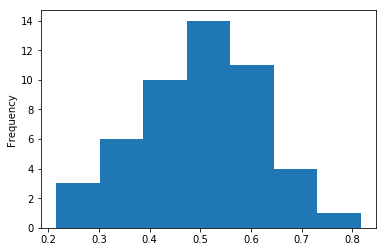

In [6]:
time_data.Times.plot.hist(7)

With only two bins, we don't get a useful distribution - it is hard to tell if the data is distributed like a gaussian function.  Try changing the number of bins from 2 to something larger in the cell above.  Try 5, 10, 20, and 100 and judge which value gives you the clearest gaussian.  Find a value that allows you to see that the data is in fact gaussian.  **Estimate** the average value (what you would report as the best value for the measurement) and the experimental standard deviation of the mean from the histogram.  Enter your answer in the cell below.

In [8]:
t_avg =.5  #Enter your estimate for the best value you would report for the time
std_t = .2  #Enter your estimate for the experimental standard deviation

print("You think that the average time is ", t_avg," and the standard deviation of the mean of the measurement is ",std_t)

You think that the average time is  0.5  and the standard deviation of the mean of the measurement is  0.2


Look at the shape of your histogram. It is reasonable to believe that from the way that the data are dispersed, we can model our knowledge about the time t with a Gaussian probability density function. The relative frequency is related to the probability p(t) of obtaining a reading of t between two values. As the number of readings in each bin approaches infinity and the width of the bins approaches zero, the relative frequency approaches this probability.

Since we have chosen a Gaussian pdf to model what we know about the data (i.e. that they are dispersed in a particular way), the best approximation of the measurand (in this case the time) is given by the mean of the data $\bar{t}$ and the standard uncertainty associated with the scatter in the data is given by the experimental standard deviation of the mean $s (\bar{t} )$ , 

$$\bar{t}=\frac{1}{N}\sum\limits_{i=1}^N t_i $$

where $N$ is the number of measurements.  The standard deviation of the measurements $s(t)$ is calculated from 

$$ s(t) = \sqrt{\frac{\sum\limits_{i=1}^N (t_i-\bar{t})^2}{N-1}}$$

The standard deviation of the **measurements** tell us how spread out the measurements are.  What we want to report is the uncertainty (or standard deviation) of the **mean** $s(\bar{t})$.

The **standard uncertainty of the mean** associated with the dispersion in the data is given by the **experimental standard deviation of the measurements** divided by $\sqrt{N}$.

$$s(\bar{t}) = \frac{s(t)}{\sqrt{N}}$$

Combining the two equations gives 

$$s(\bar{t}) = \sqrt{\frac{\sum\limits_{i=1}^N (t_i-\bar{t})^2}{N(N-1)}}$$

It is appropriate to use the formulae for $\bar{t}$ and $s(\bar{t})$ in this case because we have chosen a Gaussian probability density function to model what we know about the measurand. The best approximation of the time is associated with the midpoint of the Gaussian and the scatter is described by the average width of the Gaussian. The more dispersed (scattered) the data are, the broader the Gaussian pdf will be.

To determine the average value and standard uncertainty of the measurements, use the ```.describe()``` command.  Since we want the data set we named ```time_data``` and we are only intersted in the ```Times``` data, the command is ```time_data.Times.describe()```

Hit <kbd>Shift</kbd> + <kbd>Enter</kbd> to evaluate the cell below.

In [9]:
time_data.Times.describe()

count    49.000000
mean      0.500816
std       0.122515
min       0.216000
25%       0.425000
50%       0.501000
75%       0.578000
max       0.816000
Name: Times, dtype: float64

How does the mean and standard deviation of the measurements (std) compare to your estimates above?  Enter your answer in the cell below.

In [ ]:
print("Here is how my estimates compare to the calculated values")

The standard deviation above is the spread of the measurements and not the spread of the possible values the **mean**.  The standard deviation of the mean is $s(\bar{t}) = \frac{s(t)}{\sqrt{N}}$.

Enter the value for ```std``` after the equals sign in line 3 below and then hit <kbd>Shift</kbd> + <kbd>Enter</kbd> to evaluate the cell.

In [11]:
from math import sqrt  #The squareroot function is not part of plain Python and needs to be imported to use

std_t_measurement =   .1225 #Enter the value for std after the equals sign
N = 49    #The number of data points

std_t_mean = std_t_measurement/sqrt(N)

print("The standard deviation of the mean is ", std_t_mean)

The standard deviation of the mean is  0.017499999999999998


To finish up this part of the activity, report out your results.  Enter the mean value for t and the standard uncertainty calculated in the cell above then hit <kbd>Shift</kbd> + <kbd>Enter</kbd> to evaluate the cell.

In [13]:
t_mean = 0.501    #Enter the mean value after the equals sign
t_uncert = 0.018  #Enter the standard deviation of the mean calculated in the previous cell here

print("We can infer that the best approximation of the time t is ", t_mean,"seconds with a standard uncertainty of ", t_uncert," seconds.")

We can infer that the best approximation of the time t is  0.501 seconds with a standard uncertainty of  0.018  seconds.


We have completed a **Type A evaluation** of the standard uncertainty for the time t since we have used statistical considerations (i.e. the two formulae above) in our analysis of the set of data for t . Note that there might be other sources of uncertainty in our measurement of t, such as the uncertainty related to calibration of the stopwatch which we could estimate using a Type B evaluation. However, in most cases where we observe a scatter in repeated readings, the uncertainty calculated using a Type A evaluation will usually be the largest.

## 6.3 Analyzing the distance data

The single reading of the distance d was observed to be  337.851 metres (using the measuring tape).

Since we only have a **single reading** for d we undertake a **Type B evaluation** of $u(d)$.

What can we say about the distance d? We can model our knowledge about d using a triangular pdf. The group who made the distance measurement were also asked to estimate $a_−$ and $a_+$ , by asking themselves, “What is the minimum value that we are 100% sure that d is not, and what is the maximum value that we are 100% sure that d is not?” 

The probability distribution function (pdf) for this measurement is shown below.

<img src="C6-Fig3.png" style="width: 800px;"/>

Calculate the peak value of the probability distribution function $p(d)$.  The area of a triangle is $\frac{1}{2} base \cdot height$ and the total area of the distribution function must be 1 (why must the total value equal 1?)

Enter your value for $p(d)$ in the cell below.  Feel free to calculate the value in the cell below rather than using your calculator.

In [14]:
# Calculate p(d)
#Use the variable peak_value to represent p(d)
a_p=337.87
a_m=337.83


peak_value = 2/(a_p-a_m)   #Enter your final answer for the peak value here
print("The peak value of the probability distribution function is ", peak_value)

The peak value of the probability distribution function is  49.99999999997442


Since we are assuming a triangular distribution function for this measurement, find the standard uncertainty for the distance measurement (call it u_dist).  You will need to go back to chapter 4 in our measurements packet to answer this question.

Perform any calculations needed in the cell below.

In [ ]:
dist = 337.85   #Measured distance in meters

# Calculate u_dist here.  Name the variable u_dist



u_dist=    #Enter your final calculated value for u_dist here
print("Therefore the best approximation of the distance d is ", dist," meters with a standard uncertainty of",u_dist," meters.")

## 6.4 The final result for the speed of sound $v_s$


We now have information about the time t and the distance d , and want to say something about the speed of sound, vs which is related to t and d by $v_s = 2d/t$.

Using the best approximations for d and t , the best approximation of vs = ?


In [ ]:
# Calculate vs here


vs=  #Enter your value for vs here   
print("the best approximation of vs =",vs, "m/s")

What about the uncertainty in $v_s$?

Well, we have a standard uncertainty for t and a standard uncertainty for d, and need to use these to determine the standard uncertainty in $v_s$.

However, you first need to understand something about “propagation of uncertainties” which is dealt with in the next chapter.

You will therefore only complete section 6.5 after you have read chapter 7.

## 6.5 Completing the analysis of the final result for the speed of sound $v_s$

**Do not complete until after you have finished Chapter 7**

In order to calculate u(vs ) we use the equations from chapter 7

which gives u(vs ) = ____________________ m/s

Therefore vs = __________ ± __________ m/s.


This is our final result for the speed of sound in air as measured in this experiment.

Enter your calculations for vs and u(vs) (which we will call u_vel) in the cell below.  Perform all calculations in the cell and not on your calculator.

In [ ]:
# Calculations for vs and u_vel

vs=  #Enter the calculated value for vs
u_vel=   #Enter the calculated value for u_vel

print("The best approximate value for the speed of sound is ", vs, "plus or minus ", u_vel, "m/s.")

<img src="C6-Fig4.png" style="width: 600px;"/>

In [ ]:
### From previous chapter - delete

number_of_bins=15 #Change this number to change the number of bins the data is collected in

bin_count=time_data.Times.value_counts(bins=number_of_bins)
freq_table=pd.DataFrame({'frequency':bin_count.values, 'range':bin_count.index})
freq_table['relative_freq']=freq_table.frequency/freq_table.frequency.sum()

print(freq_table)

print('The sum of all values in the relative_freq column is ',freq_table.relative_freq.sum())